<a href="https://colab.research.google.com/github/bahador1/Monte-Carlo-Simulation-for-Shap/blob/main/monteCarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# !pip install latexify-py
from random import *
from statistics import mode
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




# Monte Carlo simulation/ estimation?

- for problems of a deterministic nature or one which have a probabilistic interpretation. Monte Carlo simulation is simulations evolving randomly!

## Example
- Imagine your friend Bob offers you to participate in a game where he throws ten dice simultaneously. If the sum of the dice is between forty and fifty, he gives you ten dollars; else, you have to pay him two dollars.

- Should you play this game?

- To decide whether to play, you should first figure out the probabilities of winning some money. Yes, you can compute the likelihood of winning the game by hand; however, why struggle with some pen and paper when you can use the computer to solve the problem?



- To perform a Monte Carlo simulation you must:

    1. Define the statistical properties of the inputs of your experiment. In our example of the dice, this is the probability that the faces of our ten dice will sum up to a certain number.
    2. Perform a large number of repetitions for your experiment – the million throws of our ten dice.
    3. Use the results of the repetitions to estimate the answer to the problem – in our case, whether we have a chance of winning some money from Bob.

In [8]:
def throw_and_sum_n_dice(n: int):
    '''
    This function throws n dice and sums the results
    '''
    total = 0
    for i in range(0,n):
        throw = randint(1,6)
        total += throw
    return total

- throw it 10times in 1 million iteration of the game

In [10]:
iterations = 1000000
winning_occurances = 0
for i in range(iterations):
    total = throw_and_sum_n_dice(10)
    if total >= 40 and total <= 50:
        winning_occurances += 1

print(f'We would\'ve won money {winning_occurances:,.0f} times -- a.k.a. {winning_occurances/iterations:.3%} of the time.')

We would've won money 203,359 times -- a.k.a. 20.336% of the time.


- Interesting. It looks as though we have a 20% chance of winning ten dollars and an 80% chance of losing two bucks, which means that the game is slightly in our favor in terms of expected value.

$$ \mathrm{Expected\_value} = 10 \cdot 20\% - 2 \cdot 80\% = 0.39 $$

- An important thing to note here is that even though we have a positive expected value, it is highly likely that if we only play once, we'll lose some money.
- So let's imagine an alternative scenario where we convince Bob to let us play this game fifty times in a row, and at the end of the rounds, we distribute the payouts. How many paths would lead us to some profit?

Let's use Monte Carlo once more to get the results.

We begin by defining our function that computes the total payout after $k$ throw

In [30]:
def compute_profit_path(k, n):
    '''
    This function returns the porfit (or loss) path at the end of
    k iterations of the game, and where we throw n dice.
    '''
    total_profit = 0
    for i in range(k):
        total = throw_and_sum_n_dice(n)
        if total >= 40 and total <= 50:
            total_profit += 10
        else:
            total_profit += -2
    return total_profit

In [32]:
winnings = compute_profit_path(50,10)
print(f'On a sinlge simulation of the game 50 times we would {"win" if winnings > 0 else "lose"} {winnings} dollars')

On a sinlge simulation of the game 50 times we would win 56 dollars


- Then, we perform Monte Carlo by simulating a **100,000 alternative paths** and computing some basic descriptive statistics with the results.

In [31]:
iterations = 100000
total_profits = []
for i in range(iterations):
    total_profits.append(compute_profit_path(50,10))

Let's describe the results



In [47]:
print(f'We would win some money {sum([1 for x in total_profits if x > 0])/iterations:.1%} of the time.')
print(f'Our simulation estimated that the maximum amount we could win is {max(total_profits)} dollars.')
print(f'Our simulation estimated that the maximum amount we could lose is {abs(min(total_profits))} dollars.')
most_common = mode(total_profits)
print(f'The most common outcome is that we win {most_common} dollars; which happens {sum([1 for x in total_profits if x == most_common])/iterations:.1%} of the time.')
print(f'We would win more than 10 dollars in {sum([1 for x in total_profits if x > 10])/iterations:.1%} of scenarios')
print(f'We would lose more than 10 dollars in {sum([1 for x in total_profits if x < -10])/iterations:.1%} of scenarios')


We would win some money 71.7% of the time.
Our simulation estimated that the maximum amount we could win is 200 dollars.
Our simulation estimated that the maximum amount we could lose is 88 dollars.
The most common outcome is that we win 20 dollars; which happens 14.0% of the time.
We would win more than 10 dollars in 58.3% of scenarios
We would lose more than 10 dollars in 17.3% of scenarios


In [88]:
profit_df = pd.DataFrame({'total_profit':total_profits})
profit_df['bin'] = pd.cut(profit_df['total_profit'], bins=[x for x in range(-90, 171, 15)])
profit_df = profit_df.groupby(['bin']).count().reset_index()
profit_df['share'] = profit_df['total_profit']/iterations

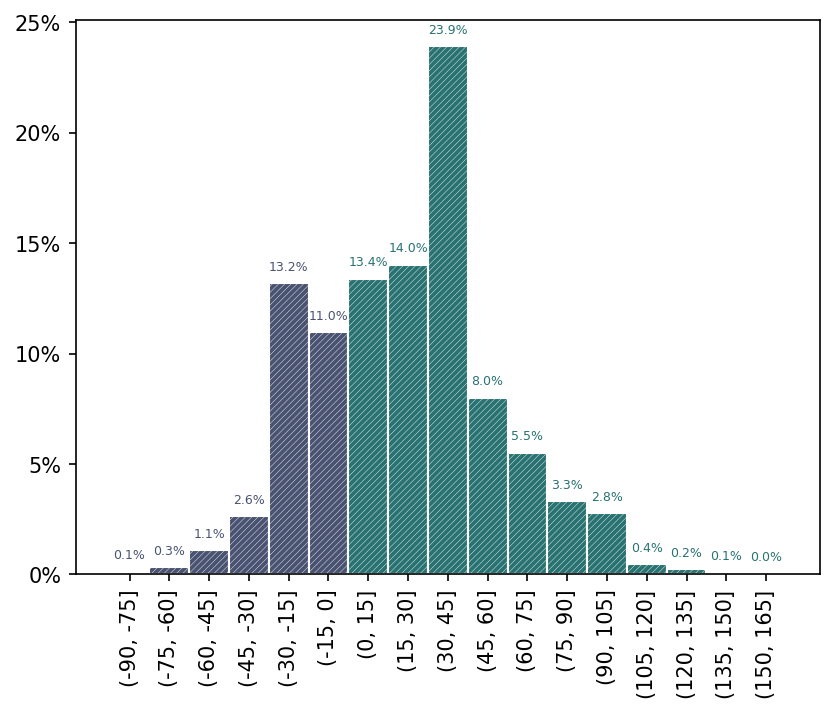

In [91]:
fig = plt.figure(dpi=150)
ax = plt.subplot()
plt.rcParams['hatch.linewidth'] = 0.2

bars_ = ax.bar(profit_df.index, profit_df['share'], hatch='////////', ec=ax.get_facecolor(), width=1)
for index, b in enumerate(bars_):
    if profit_df['bin'].iloc[index].left < 0:
        color = '#495371'
    else:
        color = '#287271'
    b.set_facecolor(color)
    ax.annotate(
        xy=(index, b.get_height()), text=f'{b.get_height():.1%}',
        xytext=(0,8), textcoords='offset points',
        ha='center', va='center',
        color=color, size=6
    )

ticks = ax.set_xticks(
    ticks=profit_df.index,
    labels=profit_df['bin'],
    rotation=90
)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0%}'))
